# Automobile Price Prediction Model: Evaluation and Refinement


## Objectives

-   Evaluate and refine automobile price prediction models

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Functions for Plotting</a></li>
        <li><a href="#ref2">Training and Testing</a></li>
        <li><a href="#ref3">Over-fitting, Under-Fitting and Model Selection</a></li>
        <li><a href="#ref4">Ridge Regression</a></li>
        <li><a href="#ref5">Grid Search</a></li>
    </ol>
</div>

In [1]:
import pandas as pd
import numpy as np

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

<a id="ref1"></a> 
## Functions for plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<a id="ref2"></a> 
## Training and Testing

In [9]:
y_data = df['price']

In [10]:
x_data=df.drop('price',axis=1)

In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [12]:
from sklearn.linear_model import LinearRegression

Creating a Linear Regression object:

In [13]:
lre=LinearRegression()

Fitting the model using the feature horsepower 

In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculating the R^2 on the test data:

In [15]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

The R^2 is much smaller using the test data.

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

<h2>Cross-validation Score</h2>


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:


In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculating the average and standard deviation of the estimate:

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


Using the negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

Using the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold for testing and the other folds are used for training.  

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<a id="ref3"></a> 
## Overfitting, Underfitting and Model Selection

Creating a Multiple linear regression object and training the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [26]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [27]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data: 


In [28]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Performing some model evaluation using the training and testing data separately. 

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examining the distribution of the predicted values of the training data.

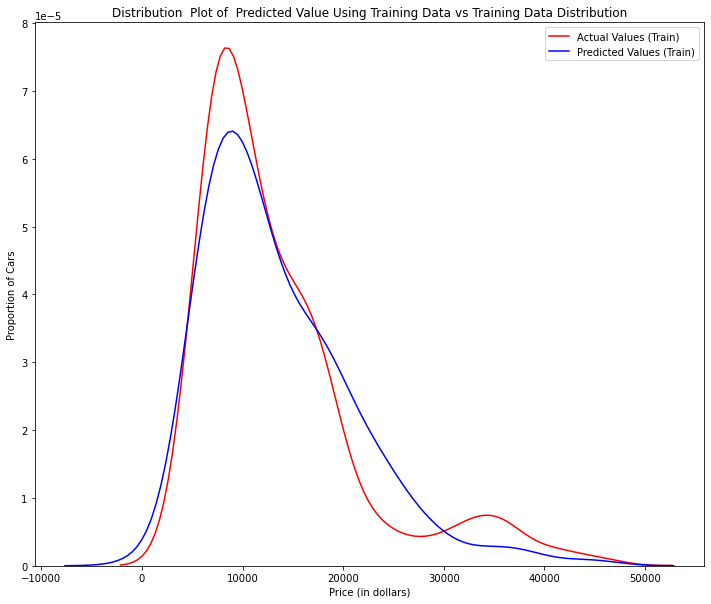

In [30]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 


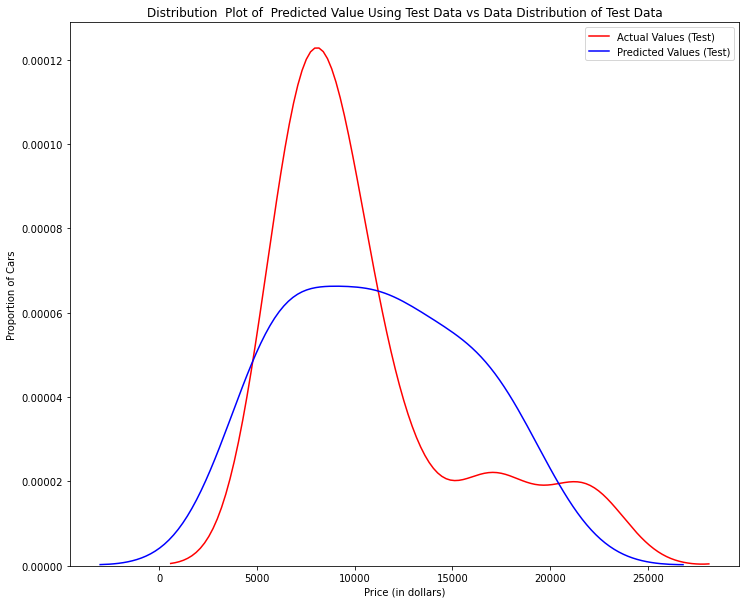

In [31]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 


Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing the model using the test-set, the model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.

Using 55 percent of the data for training and the rest for testing:

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Performing a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [34]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Creating a linear regression model "poly" and training it.

In [35]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [36]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

Taking the first five predicted values and comparing it to the actual targets. 

In [37]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


Using the function "PollyPlot" that was defined at the beginning of the lab to display the training data, testing data, and the predicted function.

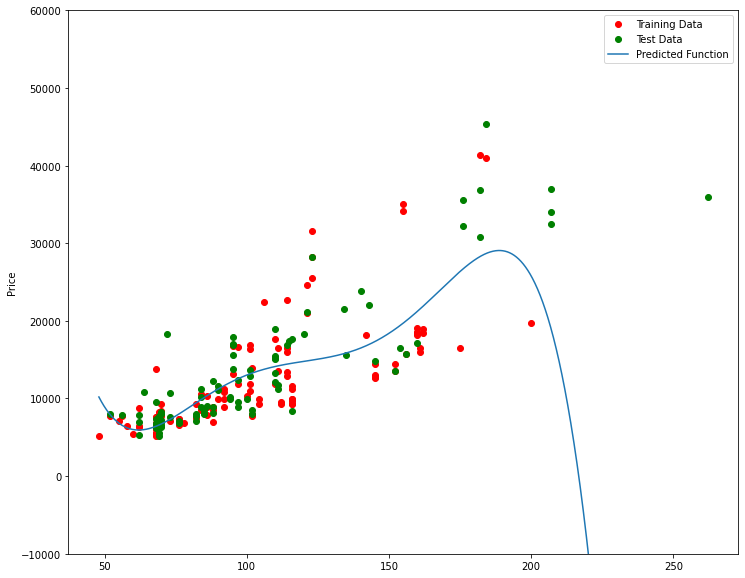

In [38]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


The estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:


In [39]:
poly.score(x_train_pr, y_train)

0.5567716899817778

 R^2 of the test data:


In [40]:
poly.score(x_test_pr, y_test)

-29.871838229908324

The R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

R^2 changes on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

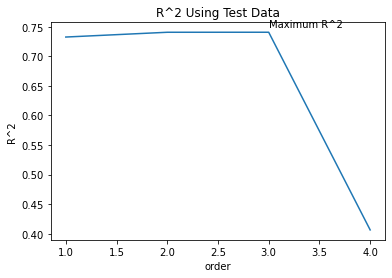

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

The following function will be used in the next section:

In [42]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows for experimenting with different polynomial orders and different amounts of data. 

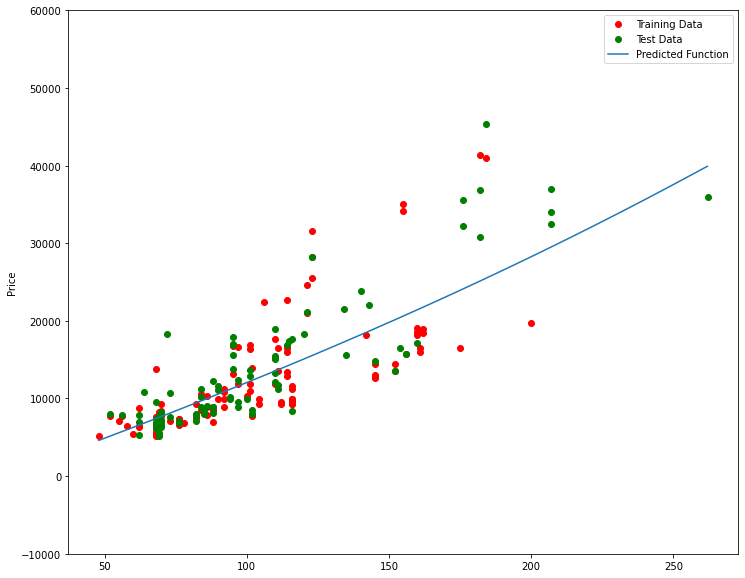

<function __main__.f(order, test_data)>

In [43]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<a id="ref4"></a> 
## Ridge regression


Using Ridge Regression to see how the parameter Alfa changes the model. Test data will be used as validation data.

Performing a degree two polynomial transformation on the data. 

In [45]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [46]:
from sklearn.linear_model import Ridge

Creating a Ridge regression object, setting the regularization parameter to 0.1 

In [47]:
RigeModel=Ridge(alpha=0.1)

In [48]:
RigeModel.fit(x_train_pr, y_train)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1)

In [49]:
yhat = RigeModel.predict(x_test_pr)

Comparing the first five predicted samples to the test set:

In [50]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


Using a for loop to select the value of Alpha that minimizes the test error:

In [51]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Plotting out the value of R^2 for different Alphas 

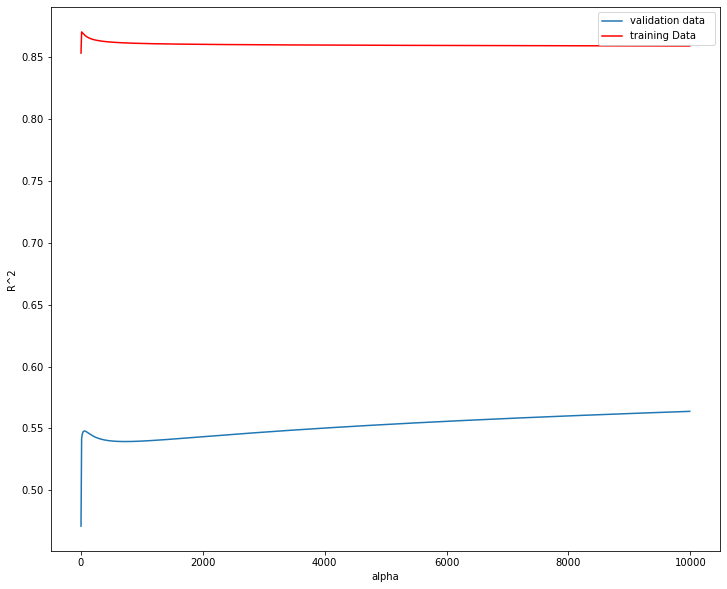

In [52]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 6**:The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Here the model is built and tested on the same data. So the training and test data are the same.

The red line in figure 6 represents the R^2 of the test data.  
As Alpha increases the R^2 decreases.  
Therefore as Alpha increases the model performs worse on the test data.  

The blue line represents the R^2 on the validation data.  
As the value for Alpha increases the R^2 increases and converges at a point  


<a id="ref5"></a> 
## Grid Search

The term Alpha is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [53]:
from sklearn.model_selection import GridSearchCV

Creating a dictionary of parameter values:

In [54]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creating a ridge regions object:

In [55]:
RR=Ridge()
RR

Ridge()

Creating a ridge grid search object 

In [56]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fitting the model 

In [57]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. The best estimator can be obtained with the best parameters and assigned to the variable BestRR as follows:

In [58]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Testing the model on the test data 

In [59]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149